In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Create a 3D dataset (3 features)
np.random.seed(42)
X = np.dot(np.random.rand(3, 3), np.random.randn(3, 200)).T

X_scaled = StandardScaler().fit_transform(X)

# 3. Apply PCA
# We want to reduce 3D -> 2D , so we took n_components=2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Results
print(f"Original shape: {X.shape}")     # (200, 3)
print(f"Reduced shape: {X_pca.shape}")  # (200, 2)

# 5. The "Magic" Metric: Explained Variance
print(f"Information retained: {np.sum(pca.explained_variance_ratio_)*100:.2f}%")


Original shape: (200, 3)
Reduced shape: (200, 2)
Information retained: 99.98%


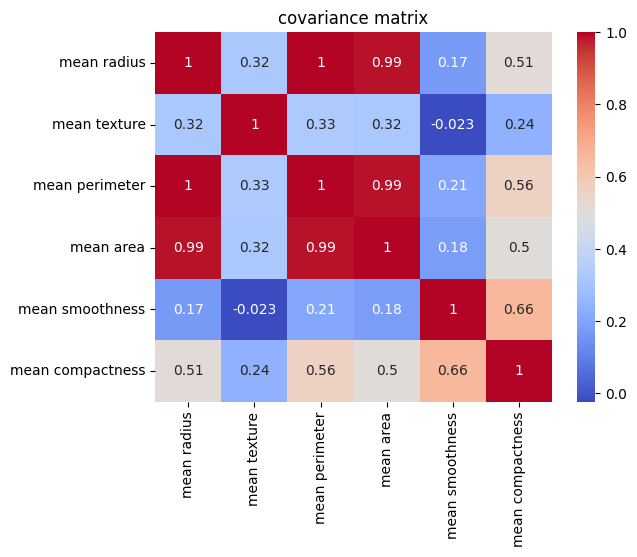

In [6]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# 1. Load and Scale
data = load_breast_cancer()
X_scaled = StandardScaler().fit_transform(data.data[:, :6]) # Taking first 6 features

# 2. Create the (Covariance Matrix)
df = pd.DataFrame(X_scaled, columns=data.feature_names[:6])
cov_matrix = df.corr() # Correlation is a scaled version of Covariance

# 3. Visualize the "Heat Map"
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm')
plt.title("covariance matrix")
plt.show()

In [24]:
import pandas
from sklearn.datasets import load_wine

data = load_wine(as_frame = True)
df = data.frame

In [27]:
df.head

<bound method NDFrame.head of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonf

In [30]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [31]:
df.duplicated().sum()

np.int64(0)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

X = df.drop('target', axis=1)
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split (X,Y,test_size = 0.3, random_state = 13)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=13)
xgb_model.fit(X_train_scaled, Y_train)

y_pred = xgb_model.predict(X_test_scaled)

print(y_pred)


[2 0 1 1 1 1 2 0 1 1 0 0 2 1 2 1 1 0 0 1 2 1 0 0 2 1 2 1 0 2 1 1 0 1 0 0 0
 2 1 2 1 2 1 1 0 0 1 0 1 1 2 0 1 0]


In [46]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay



# The Detailed Stats (Precision, Recall, F1)
print("\n--- Classification Report ---")
print(classification_report(Y_test, y_pred))




--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.96      1.00      0.98        23
           2       1.00      0.92      0.96        13

    accuracy                           0.98        54
   macro avg       0.99      0.97      0.98        54
weighted avg       0.98      0.98      0.98        54



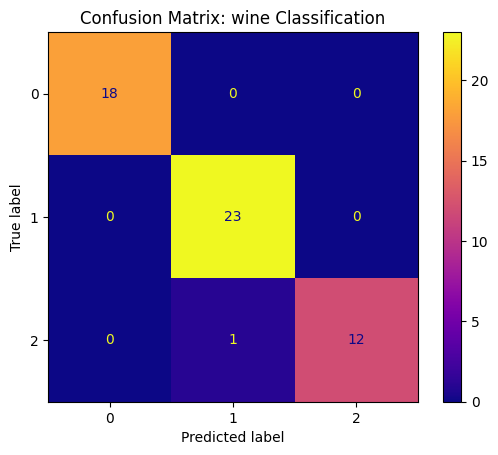

In [49]:
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1','2'])

disp.plot(cmap=plt.cm.plasma)
plt.title('Confusion Matrix: wine Classification')
plt.show()

In [50]:
'''

     THIS IS WHAT WE GOT BEFORE PCA


     '''

'\n\n     THIS IS WHAT WE GOT BEFORE PCA\n\n\n     '

In [54]:
from sklearn.decomposition import PCA

# Apply PCA on the standardized features
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


xgb_model_pca = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=13)
xgb_model_pca.fit(X_train_pca, Y_train)

# Predict the wine type on the testing set with PCA
y_pred_pca =xgb_model_pca.predict(X_test_pca)

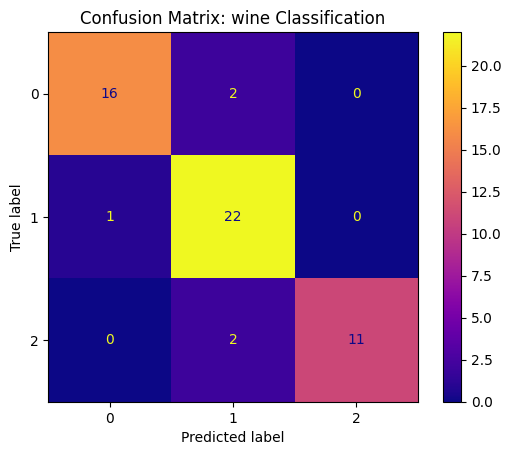

In [59]:
cm = confusion_matrix(Y_test, y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1','2'])

disp.plot(cmap=plt.cm.plasma)
plt.title('Confusion Matrix: wine Classification')
plt.show()

In [60]:
# The Detailed Stats (Precision, Recall, F1)
print("\n--- Classification Report ---")
print(classification_report(Y_test, y_pred_pca))


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.85      0.96      0.90        23
           2       1.00      0.85      0.92        13

    accuracy                           0.91        54
   macro avg       0.93      0.90      0.91        54
weighted avg       0.91      0.91      0.91        54



In [61]:
'''
 AFTER PCA , WITH JUST 5 FEATURES (COLOMNS) , WE GOT SIMILAR RESULTS

 '''

'\n AFTER PCA , WITH JUST 5 FEATURES (COLOMNS) , WE GOT SIMILAR RESULTS\n\n '

In [64]:
import numpy as np

# 1. Get the individual variance 
individual_variance = pca.explained_variance_ratio_

# 2. Calculate the Cumulative Variance 
cumulative_variance = np.cumsum(individual_variance)

# 3. Print the results 
for i, total in enumerate(cumulative_variance):
    print(f"Components 1 to {i+1} explain: {total*100:.2f}% of the data")

Components 1 to 1 explain: 36.20% of the data
Components 1 to 2 explain: 55.41% of the data
Components 1 to 3 explain: 66.53% of the data
Components 1 to 4 explain: 73.60% of the data
Components 1 to 5 explain: 80.16% of the data
Components 1 to 6 explain: 85.10% of the data
Components 1 to 7 explain: 89.34% of the data
Components 1 to 8 explain: 92.02% of the data
Components 1 to 9 explain: 94.24% of the data
Components 1 to 10 explain: 96.17% of the data
Components 1 to 11 explain: 97.91% of the data
Components 1 to 12 explain: 99.20% of the data
Components 1 to 13 explain: 100.00% of the data


In [66]:
from sklearn.decomposition import PCA

# 1. Define and Fit 
pca_2 = PCA(n_components=2)
X_pca = pca_2.fit_transform(X_scaled) # Result is 2 columns

# 2. Reconstruct using the SAME object

X_reconstructed = pca_2.inverse_transform(X_pca) 

# 3. Verify the shape
print(f"Compressed shape: {X_pca.shape}")        # (178, 2)
print(f"Reconstructed shape: {X_reconstructed.shape}") # (178, 13)

Compressed shape: (178, 2)
Reconstructed shape: (178, 13)


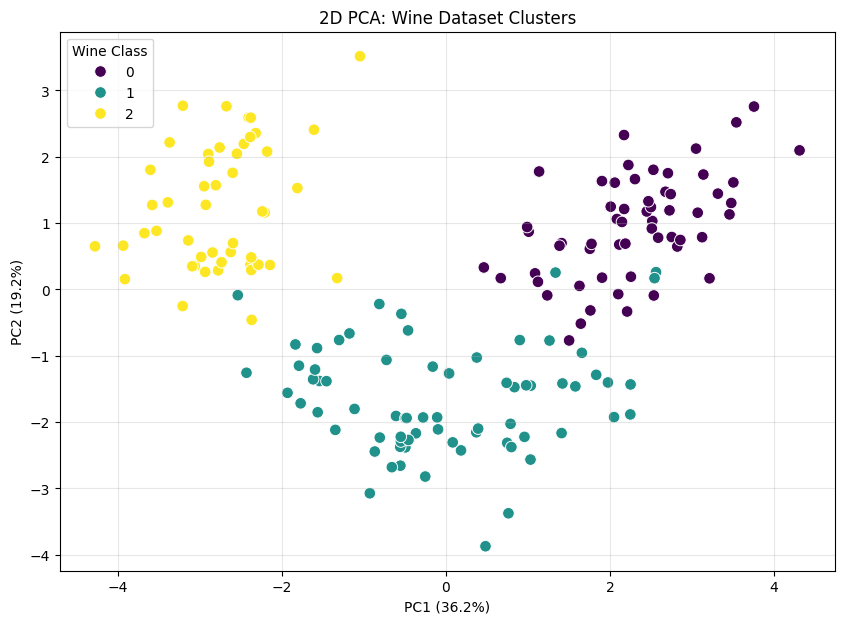

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns


pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# 2. Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=data.target, 
                palette='viridis', s=70, edgecolor='white')

plt.title('2D PCA: Wine Dataset Clusters')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
plt.legend(title='Wine Class')
plt.grid(True, alpha=0.3)
plt.show()

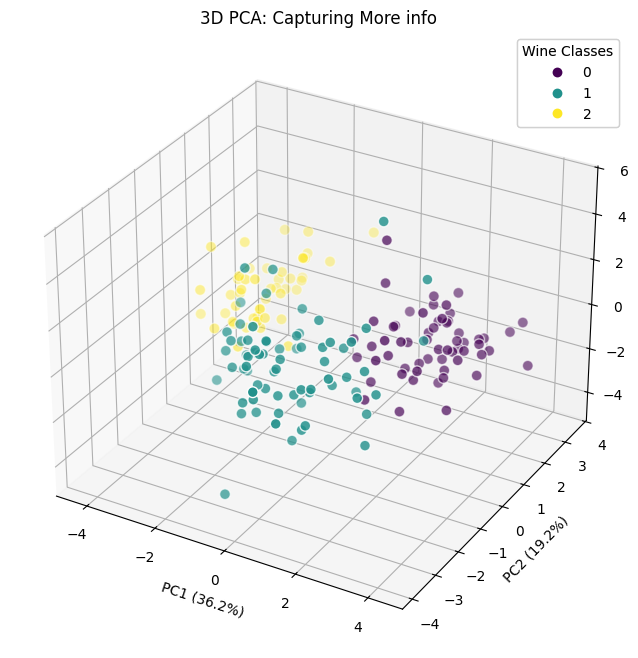

In [76]:
from mpl_toolkits.mplot3d import Axes3D

# 1. Run PCA for exactly 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# 2. Creating the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                     c=data.target, cmap='viridis', s=60, edgecolors='w')

# Labels and Title
ax.set_title("3D PCA: Capturing More info")
ax.set_xlabel(f"PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)")
ax.set_zlabel(f"PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)")

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Wine Classes")
ax.add_artist(legend1)

plt.show()